# Visualizing marker genes

In [35]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [3]:
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.2.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


Data was obtained from Emad's iHEP-ShIso 10x sequencing.

For this data, PCA and UMAP are already computed. Also, louvain clustering and cell cycle detection are present in `scEmad.h5ad`.

In [4]:
mydata = sc.read('scEmad.h5ad')

In [31]:
mydata

AnnData object with n_obs × n_vars = 12323 × 20409 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'dendrogram_louvain', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [44]:
# load tSNE and graph clustering
tsne = pd.read_csv("../10x_Emad_results/outs/analysis/tsne/2_components/projection.csv")
clusters = pd.read_csv("../10x_Emad_results/outs/analysis/clustering/graphclust/clusters.csv")
k_9_clusters = pd.read_csv("../10x_Emad_results/outs/analysis/clustering/kmeans_9_clusters/clusters.csv")

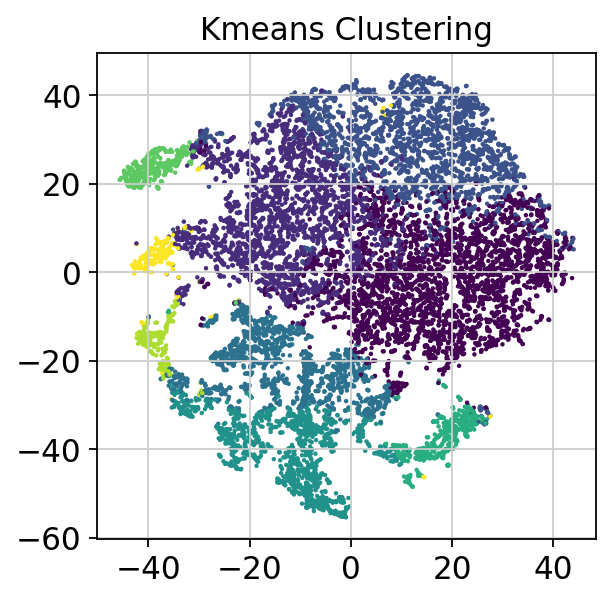

In [49]:
# plot clusters in TSNE space
plt.figure(figsize=(4, 4))
plt.scatter(tsne['TSNE-1'], tsne['TSNE-2'], c=k_9_clusters['Cluster'], linewidths=1, s=1)
plt.title('Kmeans Clustering')
plt.show()

To modify the default figure size, use `rcParams`.

In [55]:
rcParams['figure.figsize'] = 6, 6

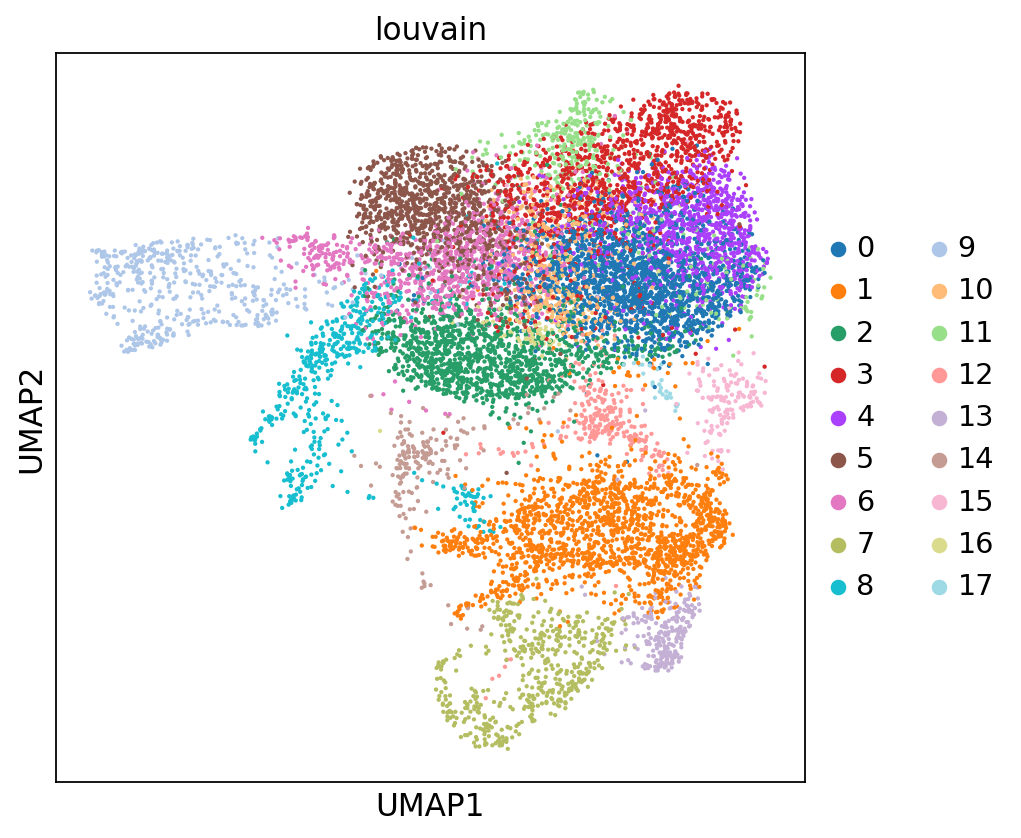

In [59]:
sc.pl.umap(mydata, color = ['louvain'], s=15)

Define list of marker genes from literature.

In [7]:
marker_genes = [
    'FOXA3' , 'HNF1A' , 'HNF4A' ,  
    'HP', 'APOA1', 'KRT8', 'VTN', 
    'APOA4', 'APOC3', 'APOE', 'ITGA6', 'DHRS3', 
#     'NR5A2', 'FBP1', 'FABP1', 'ALDH2', 'ALDH2', 'CYP3A4', 'CYP2A6',  'TDO2','CEBPA', 'ALB','PROX1' , 
#     'FGL1', 'SERPINA1'
    'COL1A2', 'COL3A1'
]

In [10]:
marker_genes_dict = {
    'C1': ['COL1A2', 'COL3A1'], 
    'C2': ['APOA4', 'APOC3'],
    'C3': ['VTN', 'HP'],
    'C4': ['FOXA3','HNF1A', 'HNF4A'],
    'C5': ['ITGA6', 'KRT8']
}

## Matrix plots

The matrixplot shows the mean expression of a gene in a group by category as a heatmap. In contrast to dotplot, the matrix plot can be used with corrected and/or scaled counts. By default raw counts are used.

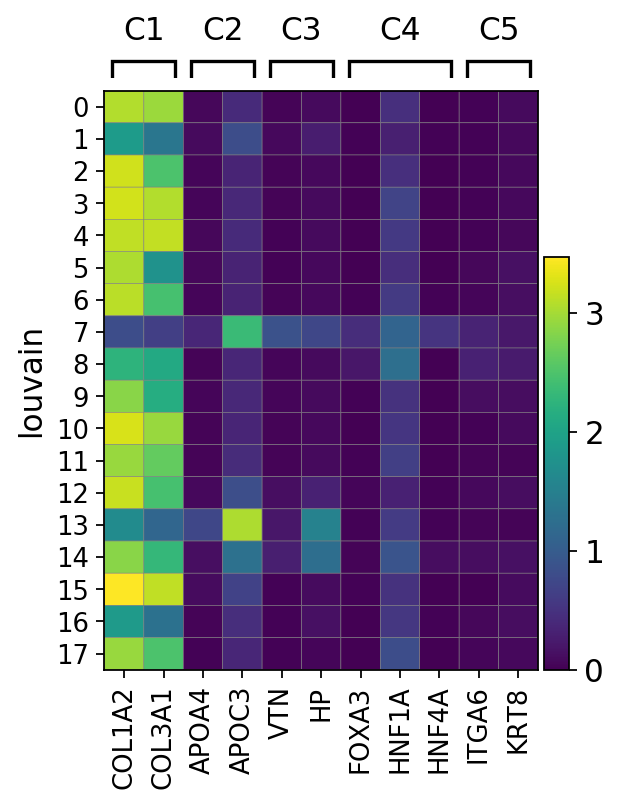

In [23]:
gs = sc.pl.matrixplot(mydata, marker_genes_dict, groupby='louvain')

Next we add a dendrogram and scale the gene expression values between 0 and 1 using `standar_scale=var`

categories: 0, 1, 2, etc.
var_group_labels: C1, C2, C3, etc.


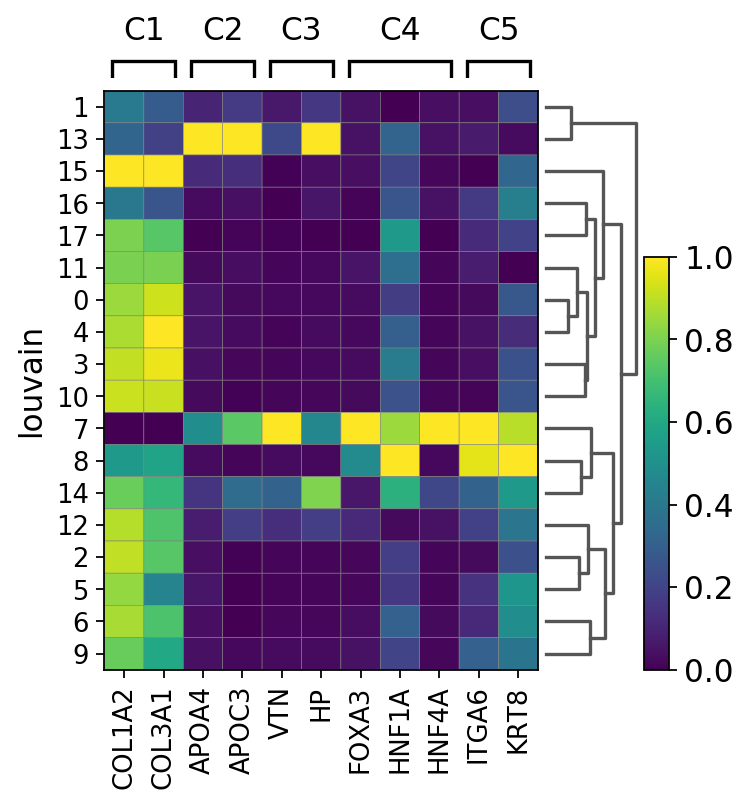

In [16]:
gs = sc.pl.matrixplot(mydata, marker_genes_dict, groupby='louvain', dendrogram=True, standard_scale='var')

In [28]:
# to use the 'non-raw' data we select marker genes present in this data.
marker_genes_2 = [x for x in marker_genes if x in mydata.var_names]

In the next figure we use:
* use_raw=False to use the scaled values (after `sc.pp.scale`) stored in pbmc.X
* vmin=-3, vmax=3, cmap='bwr' to select the max and min for the diverging color map 'bwr'
* swap_axes=True to show genes in rows
* figsize=(5,6) to modify the defult figure size

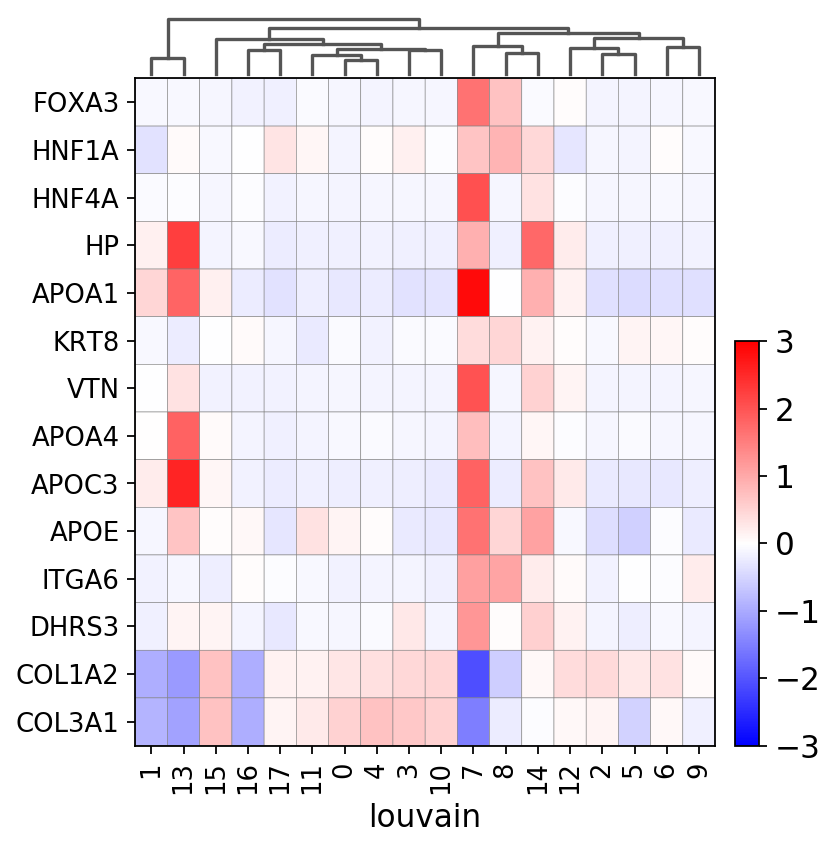

In [29]:
gs = sc.pl.matrixplot(mydata, marker_genes_2, groupby='louvain', dendrogram=True, 
                      use_raw=False, vmin=-3, vmax=3, cmap='bwr',  swap_axes=True, figsize=(5,6))

## Heatmaps

Heatmaps do not collapse cells as in previous plots. Instead, each cells is shown in a row (or columm if `swap_axes=True`). The groupby information can be added and is shown using the same color code found for `sc.pl.umap` or any other scatter plot.

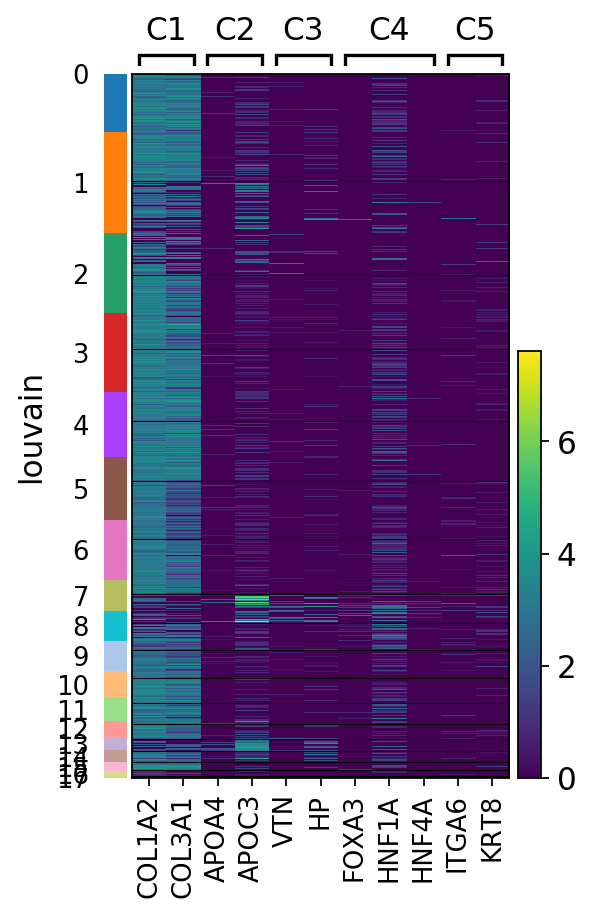

In [19]:
ax = sc.pl.heatmap(mydata,
                   marker_genes_dict, 
                   groupby='louvain')

Same as before but using `use_raw=False` to use the scaled data stored in `pbmc.X`. Some genes are highlighted using `var_groups_positions` and `var_group_labels` and the figure size is adjusted.

categories: 0, 1, 2, etc.
var_group_labels: B cells, dendritic


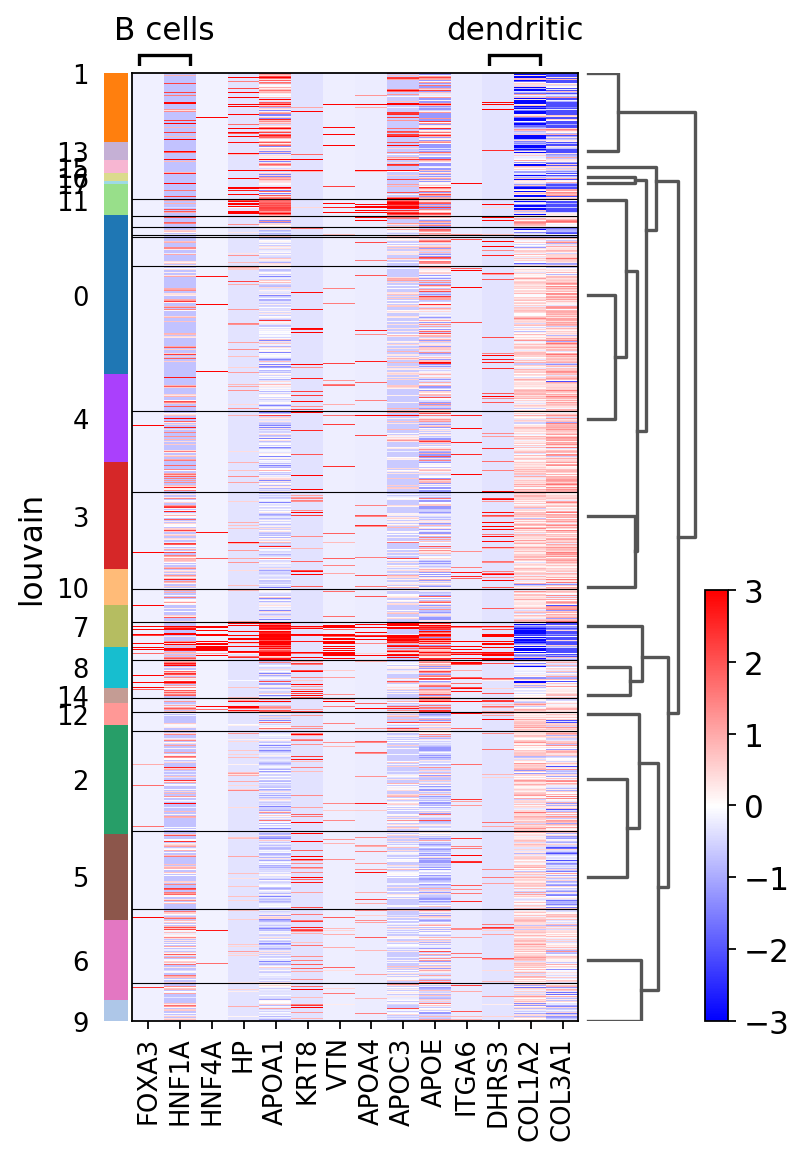

In [20]:
ax = sc.pl.heatmap(mydata, marker_genes, groupby='louvain', figsize=(5, 8), 
              var_group_positions=[(0,1), (11, 12)], use_raw=False, vmin=-3, vmax=3, cmap='bwr', 
              var_group_labels=['B cells', 'dendritic'], var_group_rotation=0, dendrogram='dendrogram_louvain')

## Tracksplots

The track plot shows the same information as the heatmap, but, instead of a color scale, the gene expression is represented by height.

In [24]:
# Track plot data is better visualized using the non-log counts
import numpy as np
ad = mydata.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

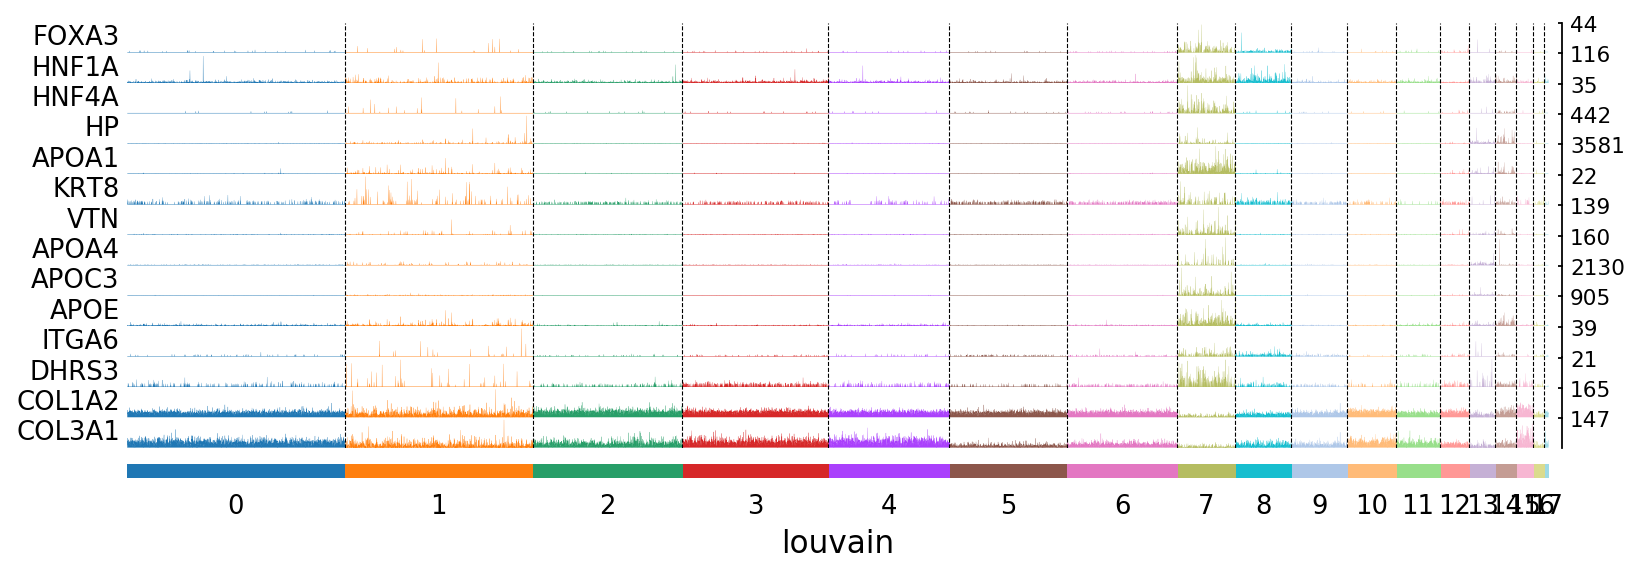

In [25]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='louvain')

## Visualization of marker genes

Gene markers are computed using the *bulk_labels* categories and the *logreg* method

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(mydata, groupby='louvain', method='logreg')

ranking genes
    finished (0:05:55)


In [ ]:
### visualize marker genes using panels

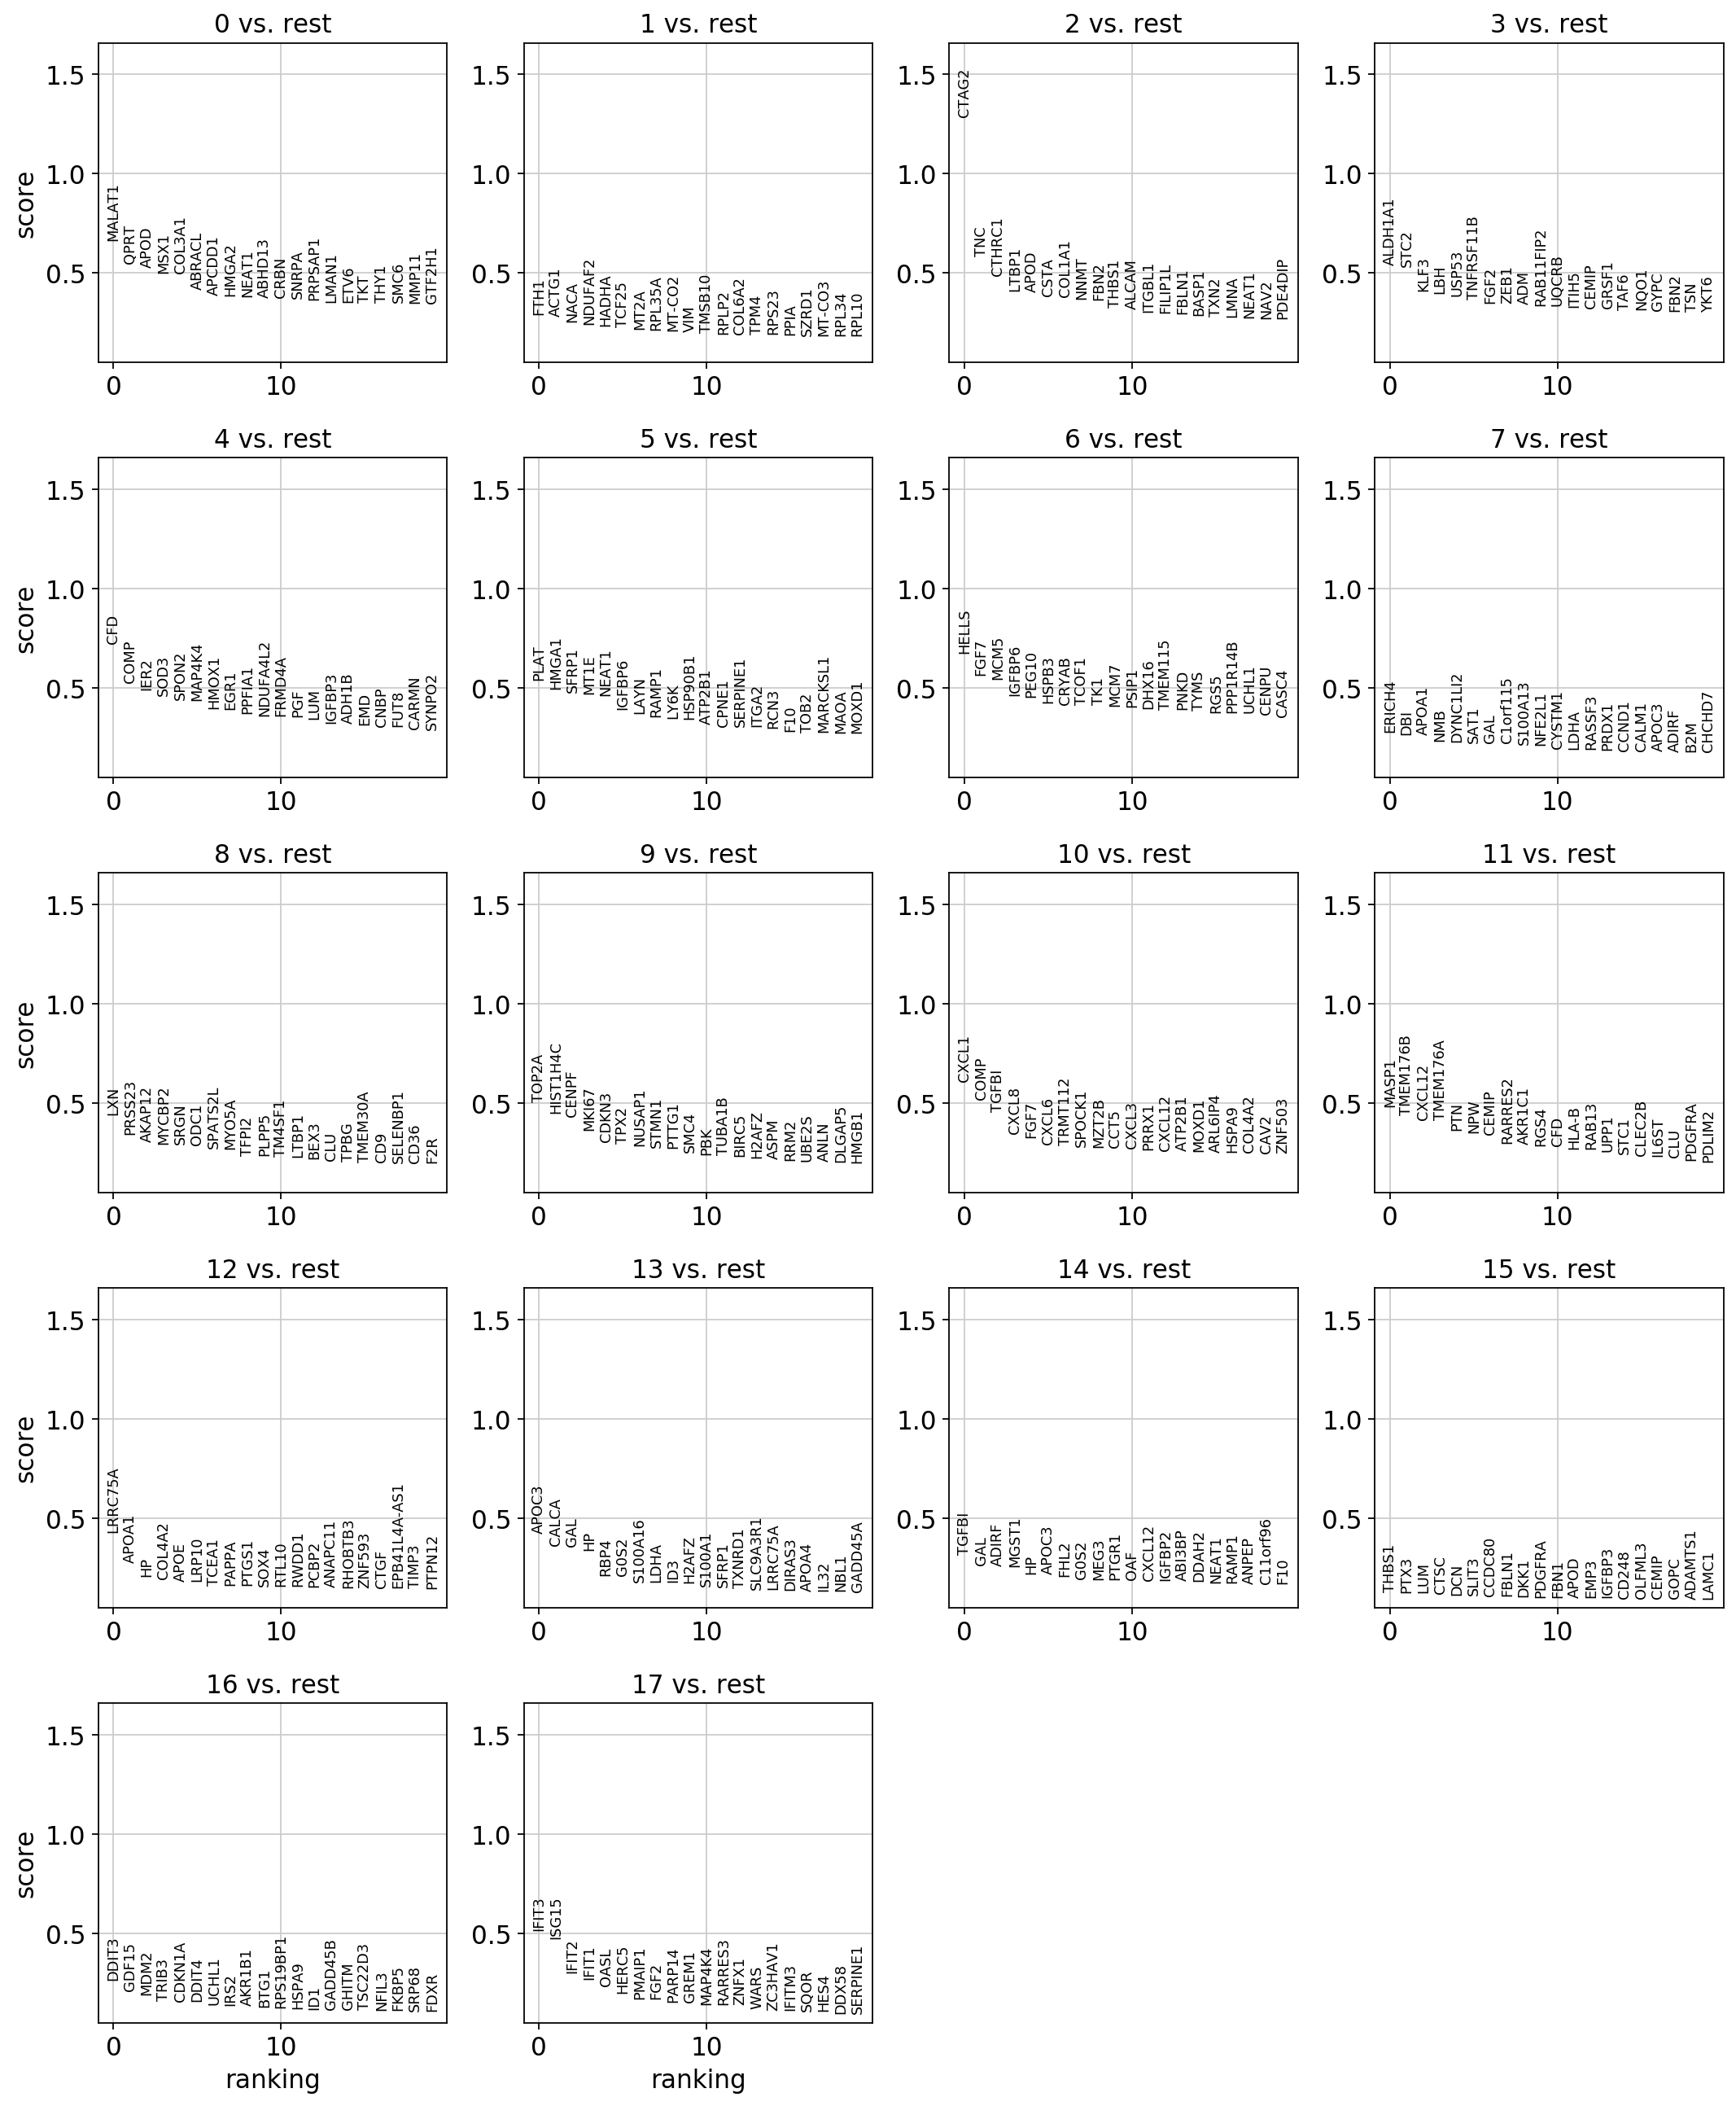

In [50]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(mydata)

### Visualize marker genes using dotplot 

In [ ]:
sc.pl.rank_genes_groups_dotplot(mydata, n_genes=4)

Dotplot showing the marker genes but with respect to 'louvain' clusters (in contrast to using the bulk_labels categories as before).

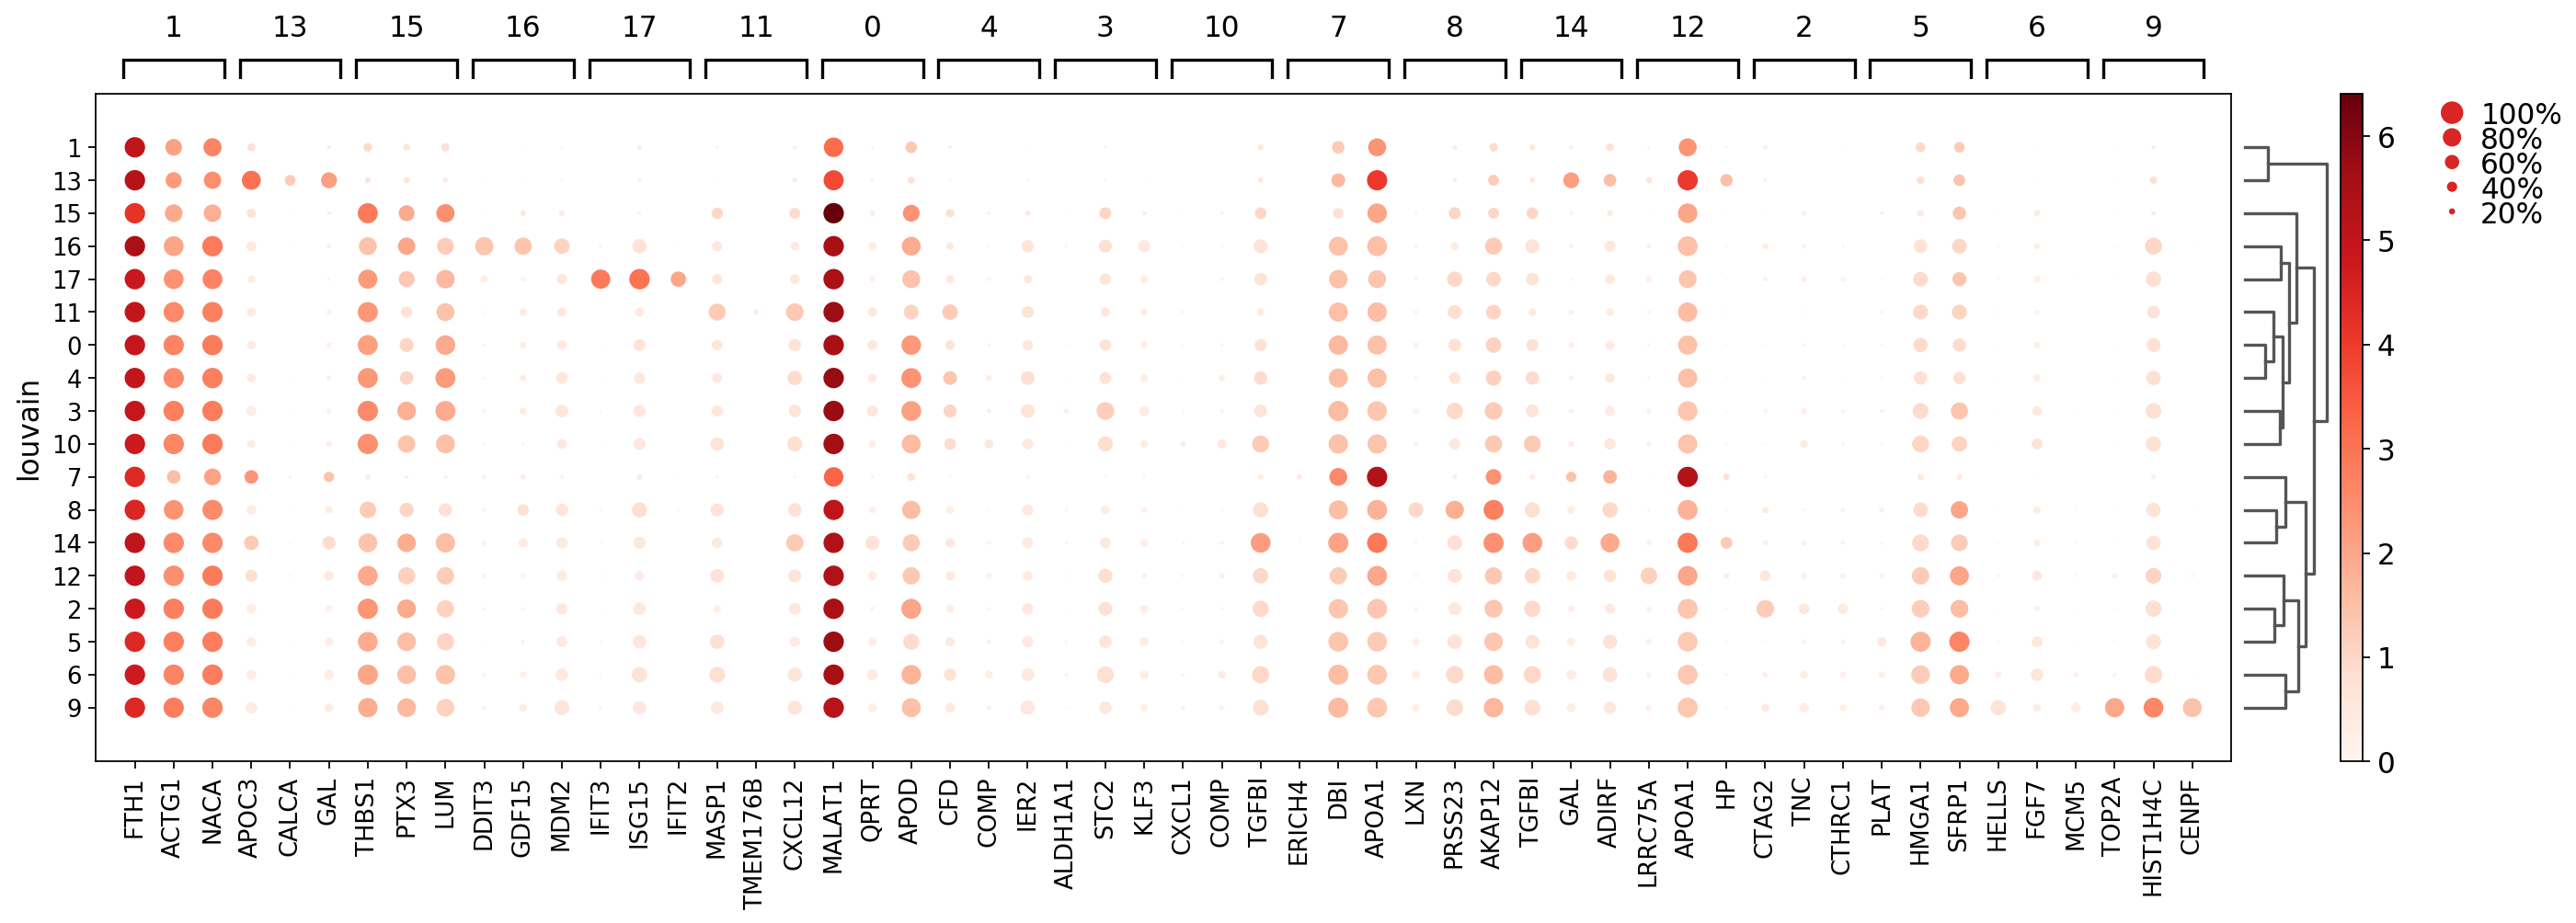

In [53]:
axs = sc.pl.rank_genes_groups_dotplot(mydata, groupby='louvain', n_genes=3, dendrogram='dendrogram_louvain')

### Visualize marker genes using matrixplot 

For the following plot the raw gene expression is scaled and the color map is changed from the default to 'Blues'

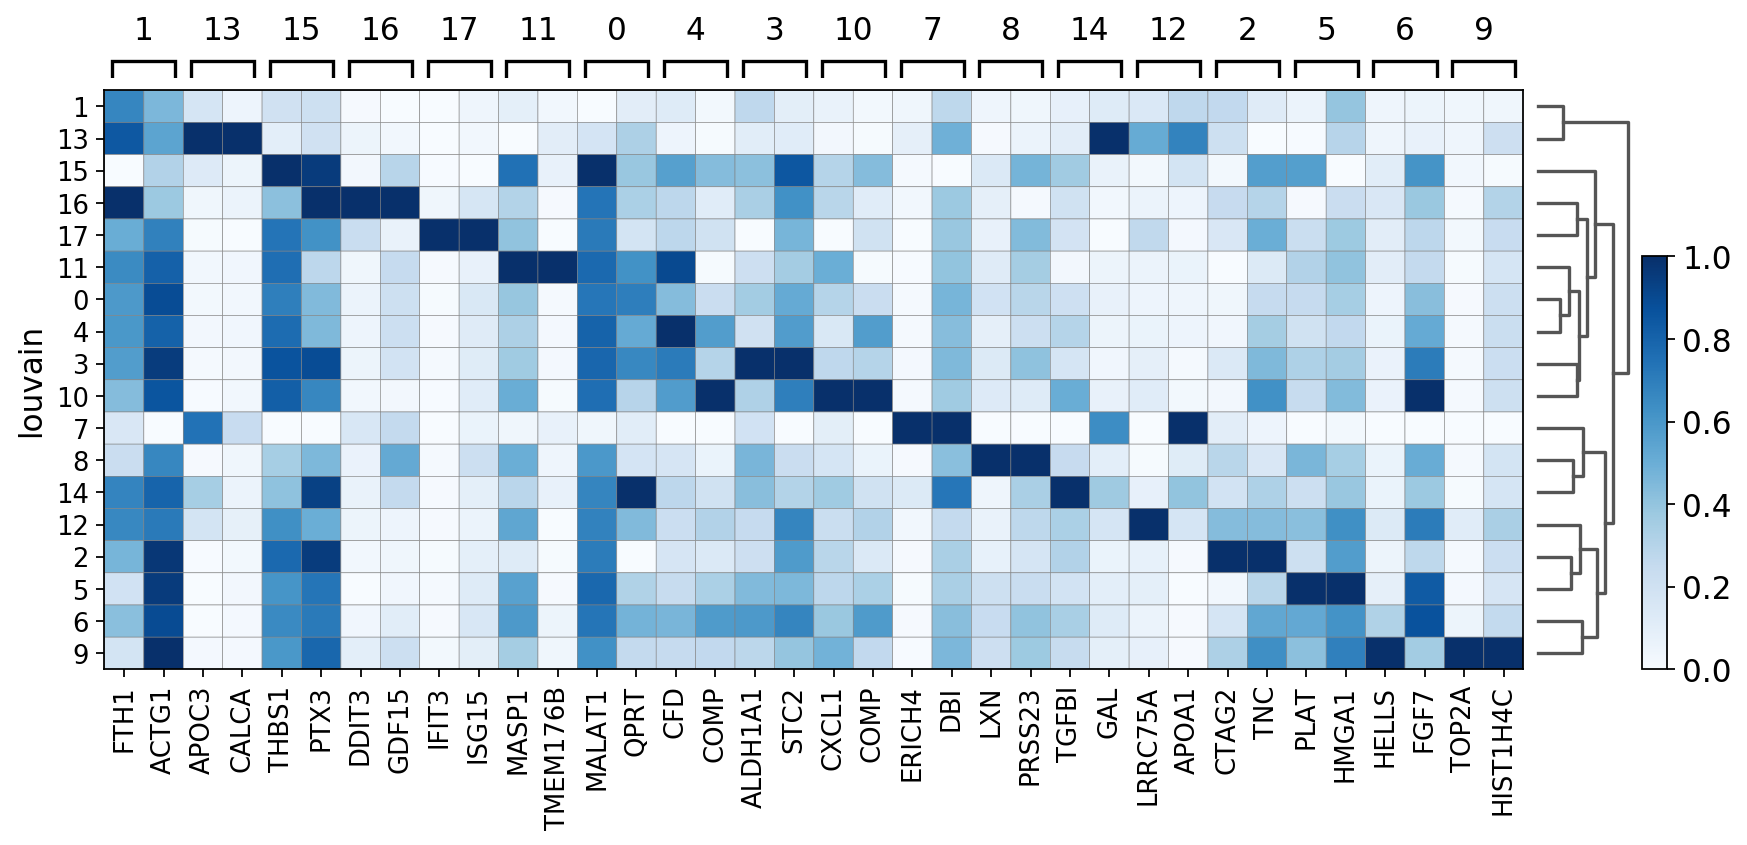

In [66]:
axs = sc.pl.rank_genes_groups_matrixplot(mydata, n_genes=2, standard_scale='var', cmap='Blues')

Same as before but using the scaled data and setting a divergent color map

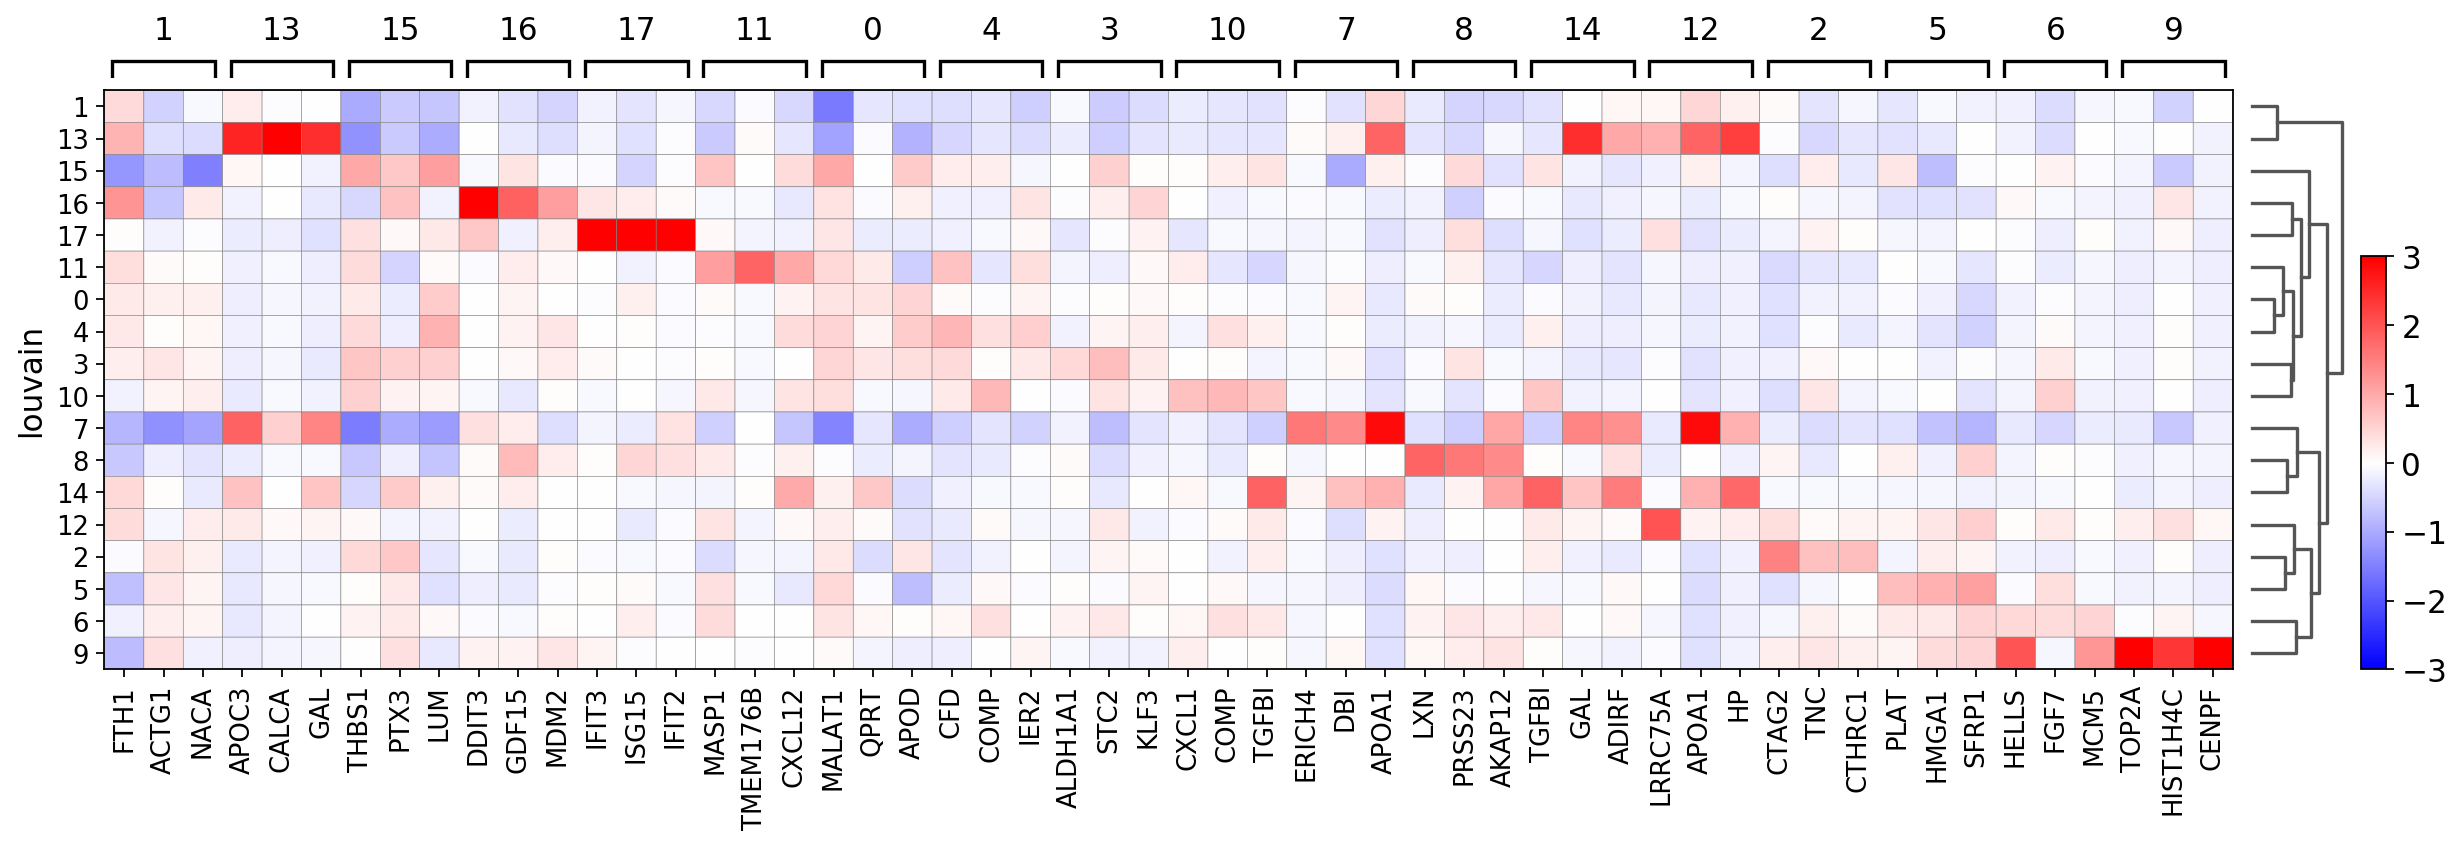

In [62]:
axs = sc.pl.rank_genes_groups_matrixplot(mydata, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

### Visualize marker genes using heatmap

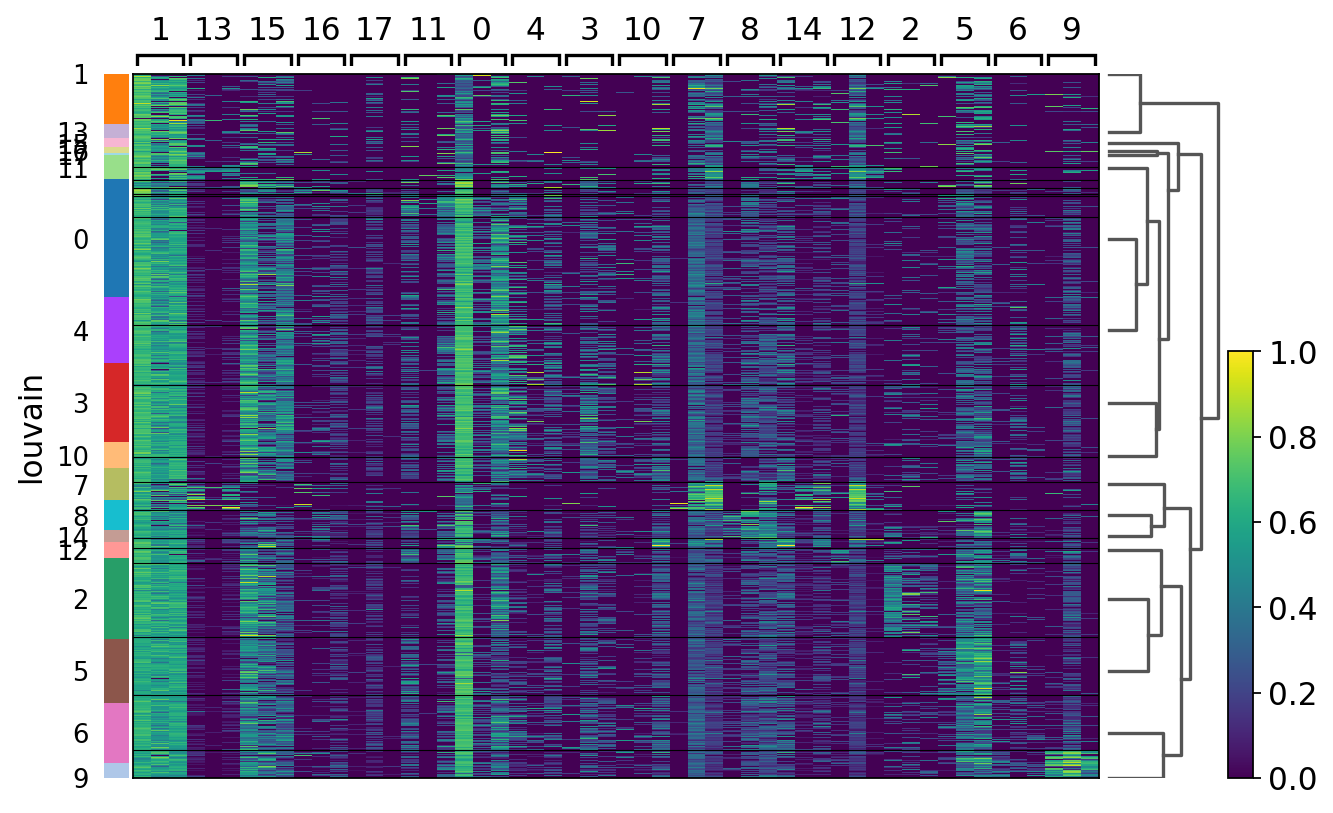

In [64]:
sc.pl.rank_genes_groups_heatmap(mydata, n_genes=3, standard_scale='var')

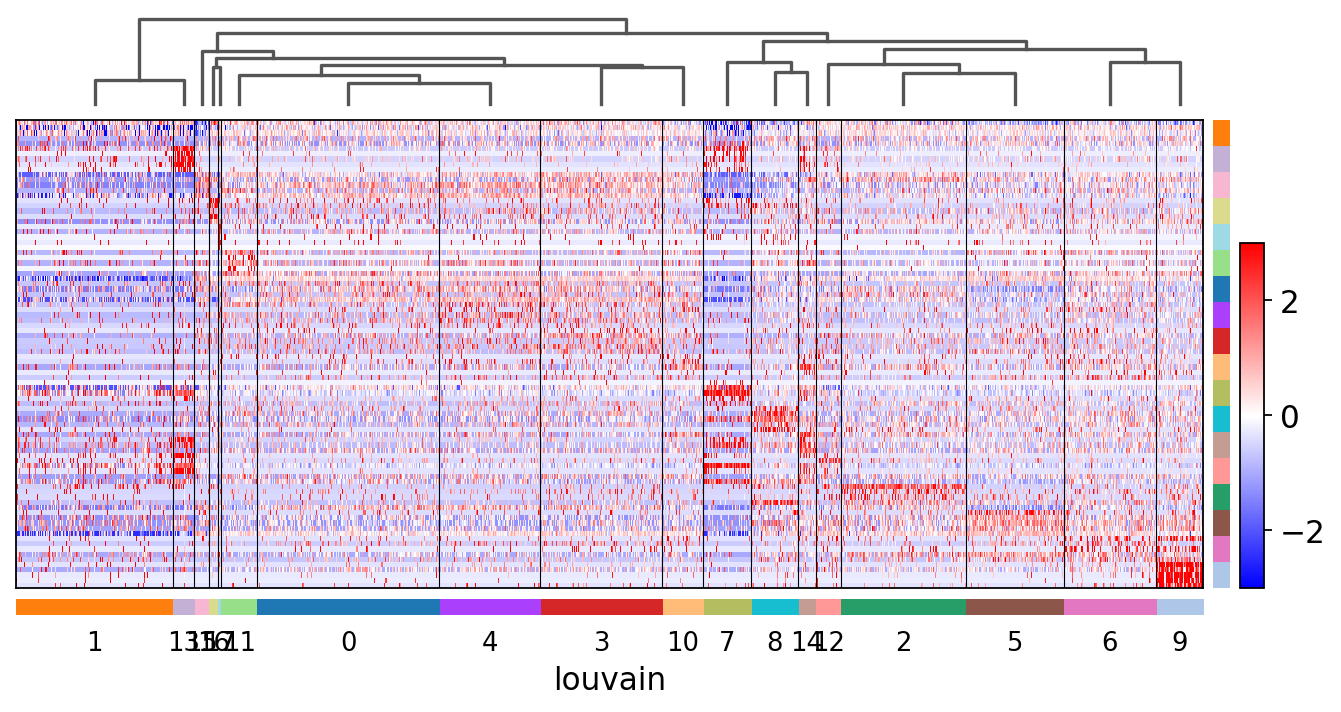

In [69]:
sc.pl.rank_genes_groups_heatmap(mydata, n_genes=5, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr')

Showing 10 genes per category, turning the gene labels off and swapping the axes. Notice that when the image is swaped, a color code for the categories appear instead of the 'brackets'.

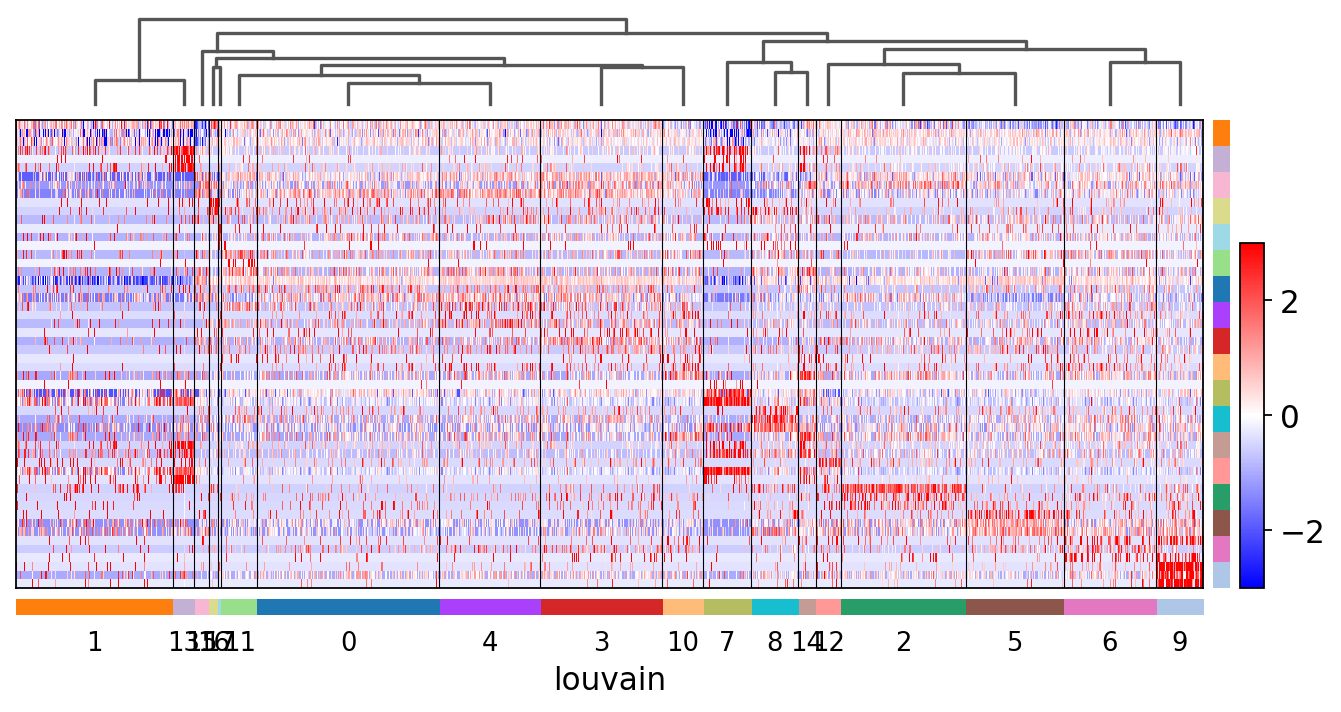

In [76]:
sc.pl.rank_genes_groups_heatmap(mydata, n_genes=3, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

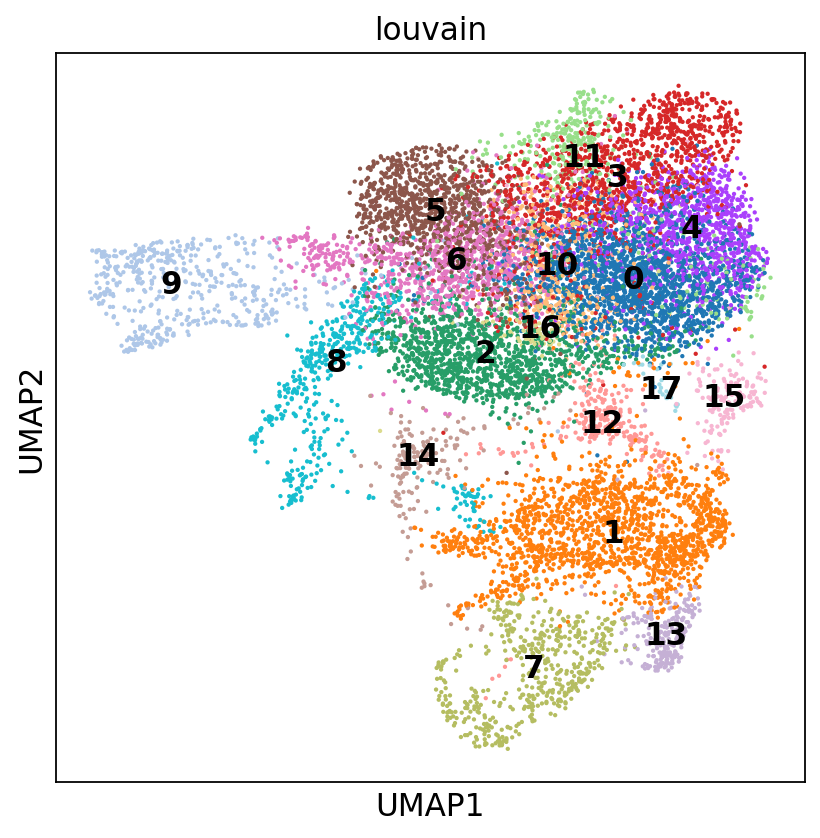

In [116]:
sc.pl.umap(mydata, color = ['louvain'],
           legend_loc='on data',
           s=15)

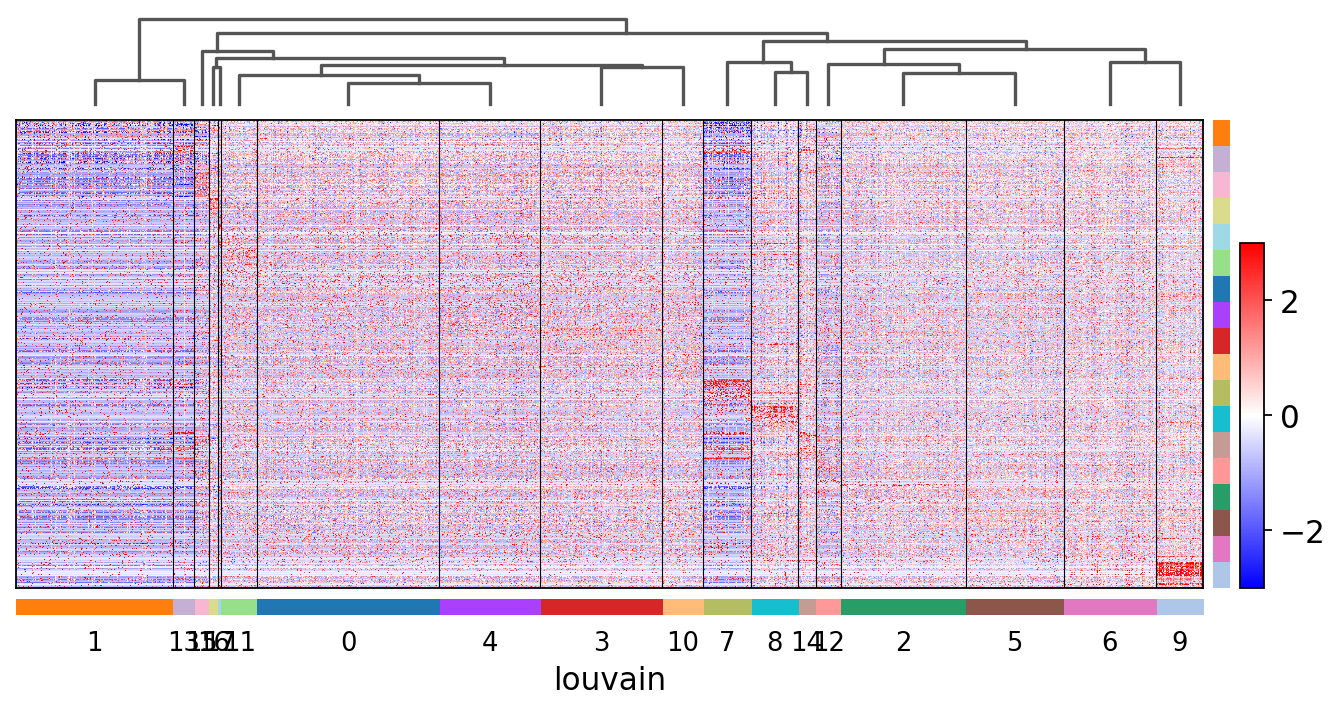

In [78]:
sc.pl.rank_genes_groups_heatmap(mydata, n_genes=200, # key='rank_genes_groups_filtered', 
                                swap_axes=True, use_raw=False, vmax=3, vmin=-3, cmap='bwr', dendrogram=True)

Reprogramming efficiency: 

In [120]:
for i in ['1', '7', '8']:
    print (f'Efficiency {i}: ',
           100 * sum(np.array(mydata.obs['louvain']) == i) / len(mydata)
          )

Efficiency 1:  13.227298547431632
Efficiency 7:  4.0412237279883145
Efficiency 8:  3.9600746571451757


In [123]:
mydata.var

gene_ids    feature_types  n_cells  highly_variable  \
index                                                                    
AL627309.1  ENSG00000238009  Gene Expression       14            False   
AL669831.5  ENSG00000237491  Gene Expression      534            False   
FAM87B      ENSG00000177757  Gene Expression        5            False   
LINC00115   ENSG00000225880  Gene Expression      276             True   
FAM41C      ENSG00000230368  Gene Expression      107            False   
...                     ...              ...      ...              ...   
AC007325.1  ENSG00000276017  Gene Expression        5            False   
AC007325.4  ENSG00000278817  Gene Expression      207            False   
AL354822.1  ENSG00000278384  Gene Expression     1087            False   
AC004556.1  ENSG00000276345  Gene Expression     2872            False   
AC240274.1  ENSG00000271254  Gene Expression      878             True   

               means  dispersions  dispersions_norm  
index                                                
AL627309.1  0.000893     0.043083         -1.081125  
AL669831.5  0.042504     0.708477          0.059394  
FAM87B      0.000975     2.035233          2.333521  
LINC00115   0.023773     1.218439          0.933495  
FAM41C      0.008400     1.049720          0.644303  
...              ...          ...               ...  
AC007325.1  0.000116    -0.696469         -2.348754  
AC007325.4  0.016357     0.512877         -0.275874  
AL354822.1  0.082478     0.428790         -0.420003  
AC004556.1  0.241300     0.843381          0.290627  
AC240274.1  0.077627     1.205532          0.911372  

[20409 rows x 7 columns]